# Daily Energy Consumption Analysis

This notebook analyzes household energy consumption patterns from the power consumption dataset. We'll load the data, perform data cleaning, aggregate by day, and create various visualizations to understand energy usage patterns over time.

In [7]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Load and Inspect Dataset

Load the household power consumption dataset from the CSV file and explore its structure.

In [8]:
# Load dataset
data = pd.read_csv("household_power_consumption.txt",
                   sep=";",
                   na_values="?")

print("Dataset Structure:")
print(data.info())
print("\nFirst 5 rows:")
print(data.head())
print(f"\nDataset shape: {data.shape}")
print(f"\nColumn names: {data.columns.tolist()}")

Dataset Structure:
<class 'pandas.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   str    
 1   Time                   str    
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), str(2)
memory usage: 142.5 MB
None

First 5 rows:
         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006 

## 2. Data Cleaning and Preparation

Convert the Date column to datetime format, ensure Global_active_power is numeric, and remove rows with missing values.

In [9]:
# Data Cleaning
# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Convert Global_active_power to numeric
data['Global_active_power'] = pd.to_numeric(data['Global_active_power'], errors='coerce')

# Remove missing values
data = data.dropna()

print(f"After cleaning, total rows: {len(data)}")
print(f"Date range: {data['Date'].min()} to {data['Date'].max()}")
print(f"Missing values remaining: {data.isnull().sum().sum()}")

After cleaning, total rows: 2049280
Date range: 2006-12-16 00:00:00 to 2010-11-26 00:00:00
Missing values remaining: 0


## 3. Daily Aggregation and Basic Statistics

Aggregate data by date to calculate daily total consumption and compute summary statistics.

In [10]:
# Daily Aggregation
daily_consumption = data.groupby('Date')['Global_active_power'].sum().reset_index()

print("Daily Consumption Summary:")
print(daily_consumption['Global_active_power'].describe())

# Basic Statistics
avg_consumption = daily_consumption['Global_active_power'].mean()
max_consumption = daily_consumption['Global_active_power'].max()
min_consumption = daily_consumption['Global_active_power'].min()

print(f"\nAverage Daily Consumption: {avg_consumption:.2f} kW")
print(f"Maximum Daily Consumption: {max_consumption:.2f} kW")
print(f"Minimum Daily Consumption: {min_consumption:.2f} kW")

Daily Consumption Summary:
count    1433.000000
mean     1561.078061
std       606.819667
min        14.218000
25%      1165.700000
50%      1542.650000
75%      1893.608000
max      4773.386000
Name: Global_active_power, dtype: float64

Average Daily Consumption: 1561.08 kW
Maximum Daily Consumption: 4773.39 kW
Minimum Daily Consumption: 14.22 kW


## 4. Peak Consumption Analysis

Identify the day with peak energy consumption and display the top 5 highest consumption days.

In [11]:
# Peak Consumption Day
peak_day = daily_consumption.loc[daily_consumption['Global_active_power'].idxmax()]
print("Peak Consumption Day:")
print(f"Date: {peak_day['Date']}")
print(f"Consumption: {peak_day['Global_active_power']:.2f} kW")

# Top 5 Highest Consumption Days
top5 = daily_consumption.nlargest(5, 'Global_active_power')
print("\nTop 5 Highest Consumption Days:")
for i, row in top5.iterrows():
    print(f"{row['Date']}: {row['Global_active_power']:.2f} kW")

Peak Consumption Day:
Date: 2006-12-23 00:00:00
Consumption: 4773.39 kW

Top 5 Highest Consumption Days:
2006-12-23 00:00:00: 4773.39 kW
2007-02-03 00:00:00: 4029.72 kW
2006-12-26 00:00:00: 3934.11 kW
2007-02-18 00:00:00: 3829.76 kW
2007-02-04 00:00:00: 3595.94 kW


## 5. Time Series Visualization

Create a line plot showing daily energy consumption over time with a reference line for average consumption.

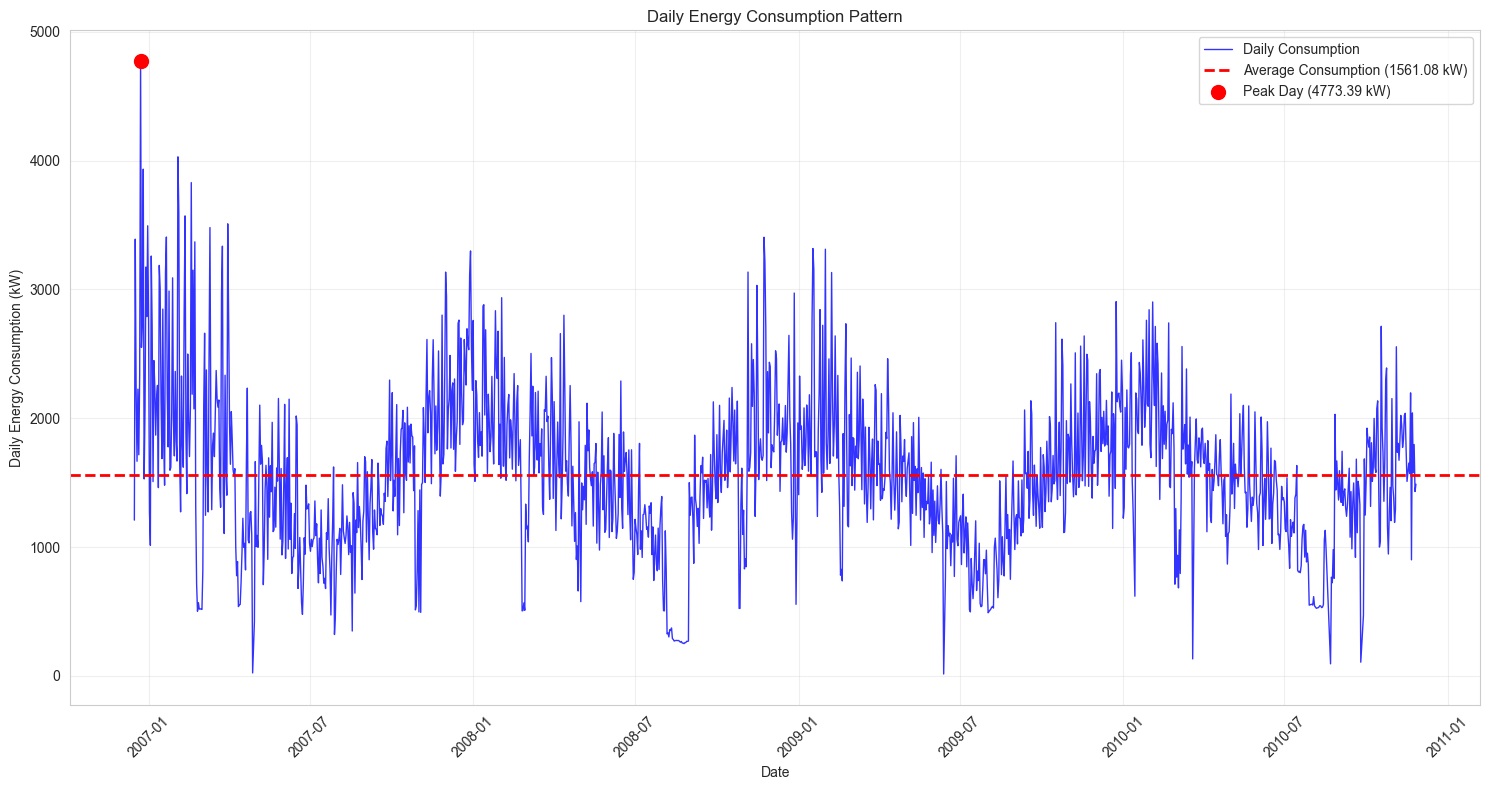

In [12]:
# Plot Daily Consumption Time Series
plt.figure(figsize=(15, 8))
plt.plot(daily_consumption['Date'], daily_consumption['Global_active_power'], 
         linewidth=1, alpha=0.8, color='blue', label='Daily Consumption')

# Add Average Line
plt.axhline(y=avg_consumption, color='red', linestyle='--', linewidth=2, 
           label=f'Average Consumption ({avg_consumption:.2f} kW)')

# Highlight Peak Day
plt.scatter(peak_day['Date'], peak_day['Global_active_power'], 
           color='red', s=100, zorder=5, label=f'Peak Day ({peak_day["Global_active_power"]:.2f} kW)')

plt.xlabel('Date')
plt.ylabel('Daily Energy Consumption (kW)')
plt.title('Daily Energy Consumption Pattern')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 6. Distribution and Outlier Analysis

Generate histogram and boxplot visualizations to understand the distribution of daily consumption and identify outliers.

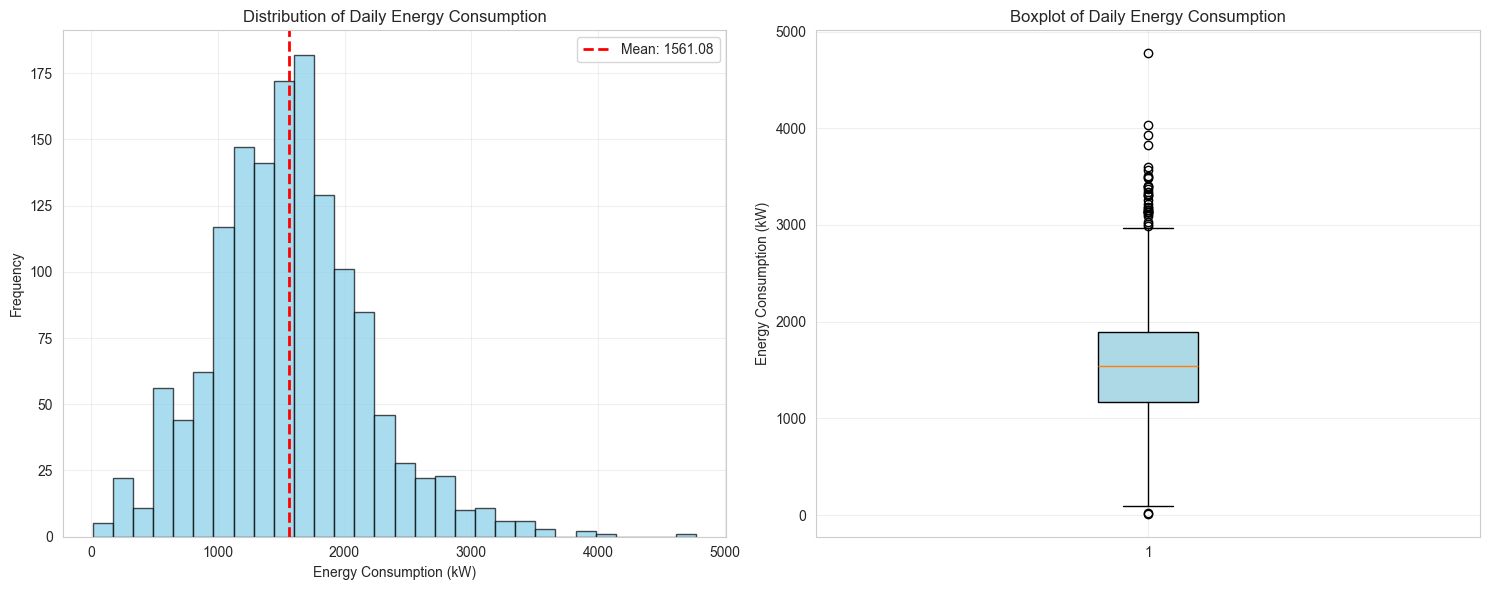

In [13]:
# Create subplots for histogram and boxplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histogram (Distribution)
ax1.hist(daily_consumption['Global_active_power'], bins=30, 
         edgecolor='black', alpha=0.7, color='skyblue')
ax1.axvline(avg_consumption, color='red', linestyle='--', linewidth=2, 
           label=f'Mean: {avg_consumption:.2f}')
ax1.set_xlabel('Energy Consumption (kW)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Daily Energy Consumption')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Boxplot (Outliers & Spread)
box_plot = ax2.boxplot(daily_consumption['Global_active_power'], patch_artist=True)
box_plot['boxes'][0].set_facecolor('lightblue')
ax2.set_ylabel('Energy Consumption (kW)')
ax2.set_title('Boxplot of Daily Energy Consumption')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Top Consumption Days Analysis

Create a bar plot displaying the top 10 days with the highest energy consumption.

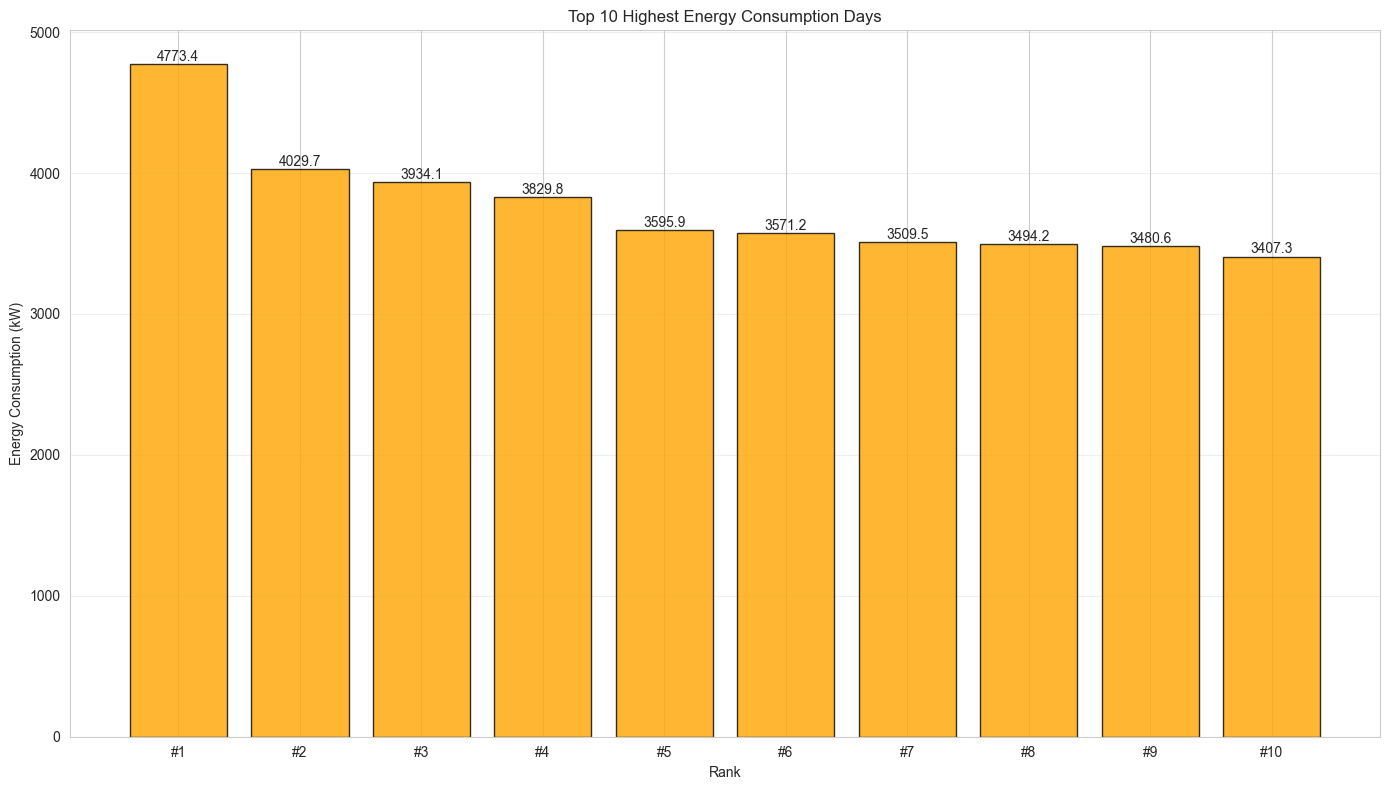


Top 10 dates with highest consumption:
#1: 2006-12-23 - 4773.39 kW
#2: 2007-02-03 - 4029.72 kW
#3: 2006-12-26 - 3934.11 kW
#4: 2007-02-18 - 3829.76 kW
#5: 2007-02-04 - 3595.94 kW
#6: 2007-02-11 - 3571.23 kW
#7: 2007-03-31 - 3509.51 kW
#8: 2006-12-31 - 3494.20 kW
#9: 2007-03-11 - 3480.64 kW
#10: 2007-01-21 - 3407.26 kW


In [14]:
# Top 10 Highest Consumption Days
top10 = daily_consumption.nlargest(10, 'Global_active_power')

plt.figure(figsize=(14, 8))
bars = plt.bar(range(len(top10)), top10['Global_active_power'], 
               color='orange', alpha=0.8, edgecolor='black')

# Add value labels on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Rank')
plt.ylabel('Energy Consumption (kW)')
plt.title('Top 10 Highest Energy Consumption Days')
plt.xticks(range(len(top10)), [f'#{i+1}' for i in range(len(top10))])
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\nTop 10 dates with highest consumption:")
for i, row in top10.iterrows():
    print(f"#{top10.index.get_loc(i)+1}: {row['Date'].strftime('%Y-%m-%d')} - {row['Global_active_power']:.2f} kW")

## 8. Monthly Trend Analysis

Aggregate consumption by month and visualize the monthly consumption trend over time.

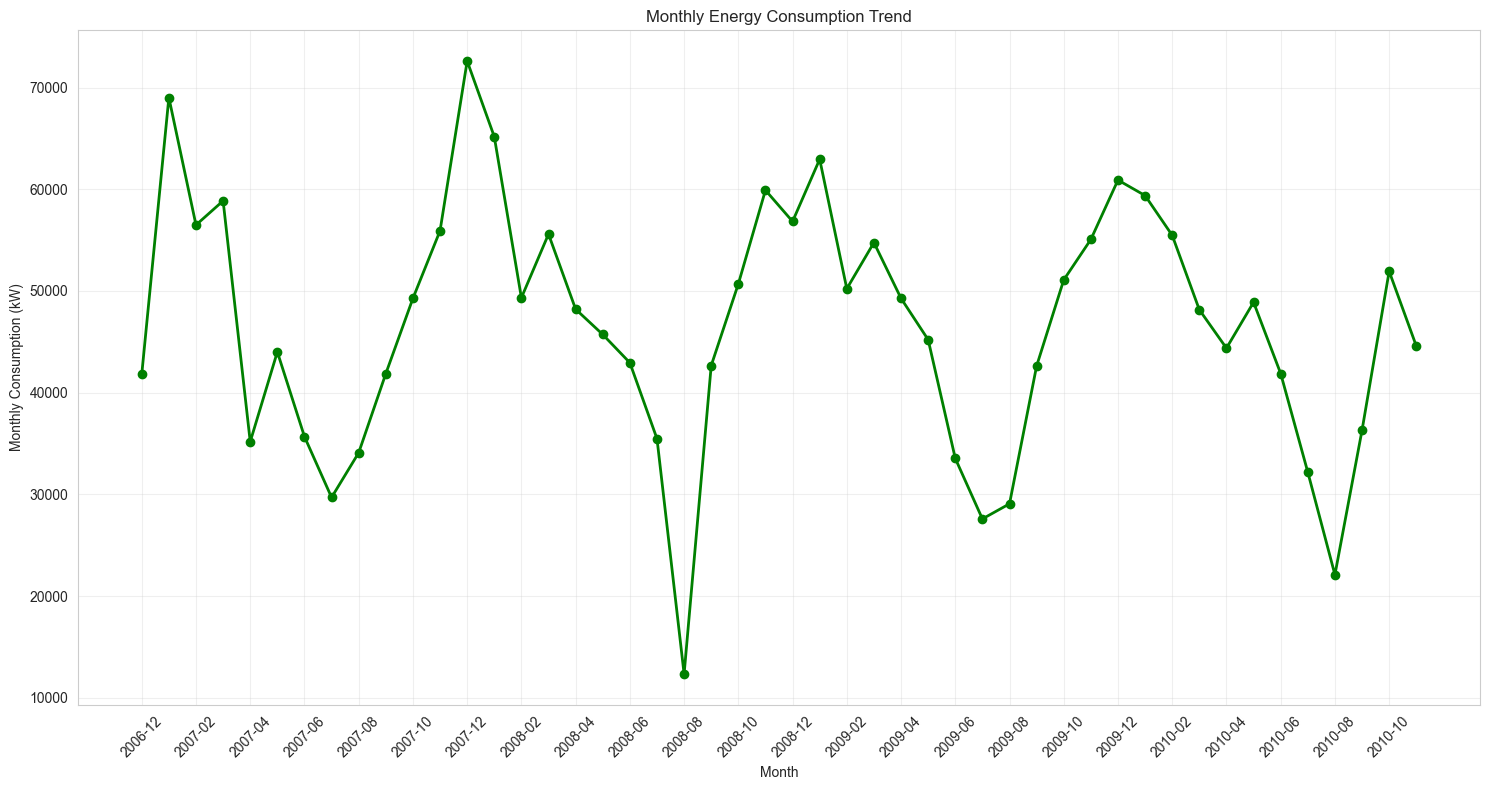

Monthly consumption statistics:
Highest monthly consumption: 72604.17 kW
Lowest monthly consumption: 12341.88 kW
Average monthly consumption: 46604.68 kW


In [15]:
# Monthly Trend
daily_consumption['Month'] = daily_consumption['Date'].dt.to_period('M')
monthly_data = daily_consumption.groupby('Month')['Global_active_power'].sum().reset_index()
monthly_data['Month_str'] = monthly_data['Month'].astype(str)

plt.figure(figsize=(15, 8))
plt.plot(monthly_data.index, monthly_data['Global_active_power'], 
         marker='o', linewidth=2, markersize=6, color='green')

plt.xlabel('Month')
plt.ylabel('Monthly Consumption (kW)')
plt.title('Monthly Energy Consumption Trend')
plt.xticks(monthly_data.index[::2], monthly_data['Month_str'][::2], rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display monthly statistics
print("Monthly consumption statistics:")
print(f"Highest monthly consumption: {monthly_data['Global_active_power'].max():.2f} kW")
print(f"Lowest monthly consumption: {monthly_data['Global_active_power'].min():.2f} kW")
print(f"Average monthly consumption: {monthly_data['Global_active_power'].mean():.2f} kW")

## 9. Weekday Pattern Analysis

Calculate average consumption by weekday and create a bar plot to show consumption patterns across different days of the week.

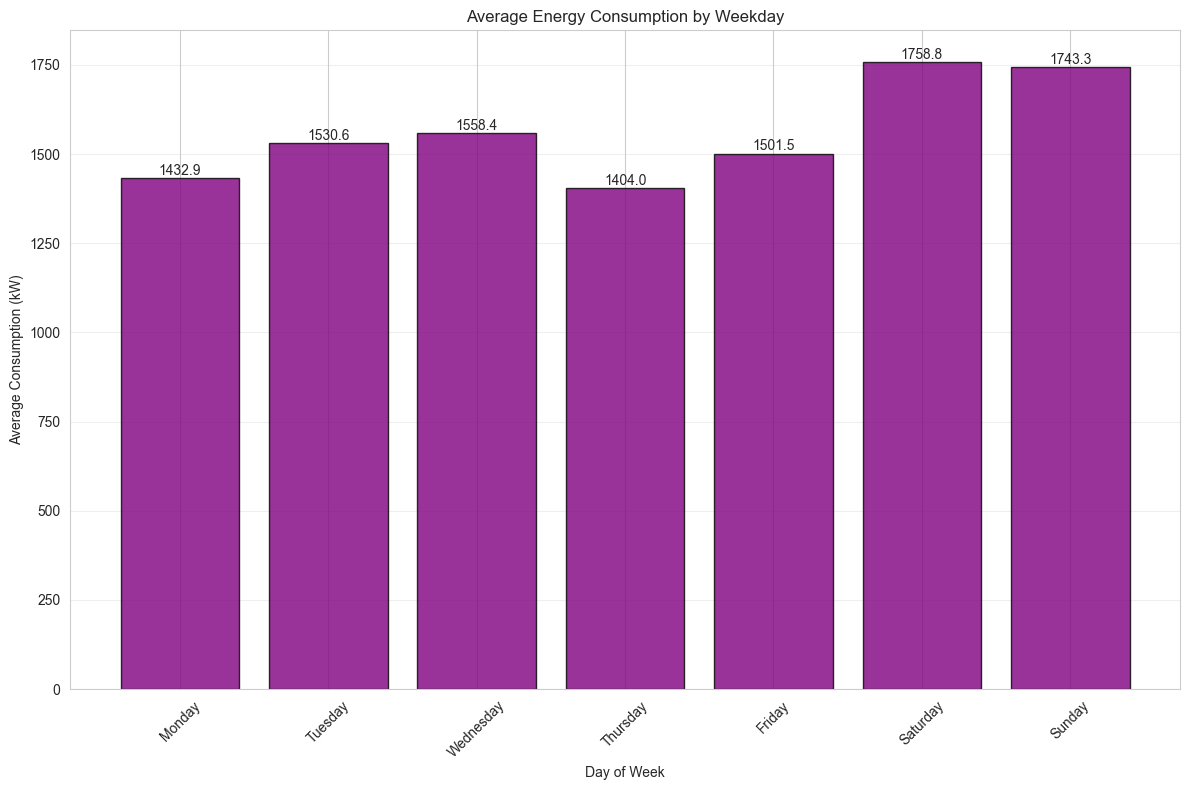

Average consumption by weekday:
Monday: 1432.85 kW
Tuesday: 1530.59 kW
Wednesday: 1558.39 kW
Thursday: 1404.03 kW
Friday: 1501.54 kW
Saturday: 1758.77 kW
Sunday: 1743.30 kW


In [16]:
# Weekday Pattern
daily_consumption['Weekday'] = daily_consumption['Date'].dt.day_name()

# Define the correct order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate average consumption by weekday
weekday_data = daily_consumption.groupby('Weekday')['Global_active_power'].mean().reindex(weekday_order)

plt.figure(figsize=(12, 8))
bars = plt.bar(weekday_data.index, weekday_data.values, 
               color='purple', alpha=0.8, edgecolor='black')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Day of Week')
plt.ylabel('Average Consumption (kW)')
plt.title('Average Energy Consumption by Weekday')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("Average consumption by weekday:")
for day, consumption in weekday_data.items():
    print(f"{day}: {consumption:.2f} kW")